In [8]:
import os
import base64
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.cm as cm
import numpy as np


In [9]:
# Define regions and corresponding landmark indices
regions = {
    'Left Eye': [4, 5, 6, 7, 8, 37, 38, 39],
    'Right Eye': [2, 9, 10, 11, 12, 40, 41, 42],
    'Nose, Mouth, and Whiskers': [1, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48],
    'Forehead': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    'Left Ear': [23, 24, 25, 26, 27],
    'Right Ear': [27, 28, 29, 30, 31]
}

# Function to calculate the mean point of landmarks
def mean_point(landmarks, indices):
    x_coords = [landmarks[i]['x'] for i in indices if i < len(landmarks)]
    y_coords = [landmarks[i]['y'] for i in indices if i < len(landmarks)]
    mean_x = np.mean(x_coords)
    mean_y = np.mean(y_coords)
    return mean_x, mean_y

# Function to convert image to base64 string
def convert_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_string

# Function to create JSON payload for the API request
def create_json_payload(image_path, image_base64_string):
    payload = {
        "name": image_path.split("\\")[-1],  # Extract the filename from the path
        "image": f"data:image/jpeg;base64,{image_base64_string}"
    }
    return json.dumps(payload)

# Function to send image for landmark detection
def send_image_for_processing(image_path, url):
    image_base64_string = convert_image_to_base64(image_path)
    request = create_json_payload(image_path, image_base64_string)

    headers = {'Content-Type': 'application/json'}

    response = requests.post(url, data=request, headers=headers)

    if response.status_code == 200:
        print(f"Image processed successfully: {image_path}")
        return response.json()
    else:
        print(f"Failed to process image: {image_path}, Status code: {response.status_code}")
        return None


Image processed successfully: C:\Users\Wanlipa\Desktop\Deep Learing\project\cat-facial-expression-recognition\cat-facial-expression-recognition\Images\sad\63.jpg
Result: [{'cat': {'bbox': {'pul': {'x': 142, 'y': 13}, 'pbr': {'x': 1538, 'y': 1217}, 'label': 'cat', 'score': 0.9177518486976624}, 'landmarks': [{'x': 841, 'y': 1085, 'label': 'part0', 'score': '1.00'}, {'x': 1032, 'y': 785, 'label': 'part1', 'score': '1.00'}, {'x': 843, 'y': 1134, 'label': 'part2', 'score': '1.00'}, {'x': 649, 'y': 781, 'label': 'part3', 'score': '1.00'}, {'x': 572, 'y': 721, 'label': 'part4', 'score': '1.00'}, {'x': 729, 'y': 775, 'label': 'part5', 'score': '1.00'}, {'x': 647, 'y': 670, 'label': 'part6', 'score': '1.00'}, {'x': 648, 'y': 816, 'label': 'part7', 'score': '1.00'}, {'x': 1115, 'y': 740, 'label': 'part8', 'score': '1.00'}, {'x': 959, 'y': 789, 'label': 'part9', 'score': '1.00'}, {'x': 1033, 'y': 687, 'label': 'part10', 'score': '1.00'}, {'x': 1030, 'y': 828, 'label': 'part11', 'score': '1.00'}, 

C:\Users\Wanlipa\AppData\Local\Temp\ipykernel_22656\2703618588.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Image processed successfully: C:\Users\Wanlipa\Desktop\Deep Learing\project\cat-facial-expression-recognition\cat-facial-expression-recognition\Images\sad\84.jpg
Result: [{'cat': {'bbox': {'pul': {'x': 145, 'y': 58}, 'pbr': {'x': 343, 'y': 269}, 'label': 'cat', 'score': 0.9347067475318909}, 'landmarks': [{'x': 223, 'y': 245, 'label': 'part0', 'score': '1.00'}, {'x': 257, 'y': 196, 'label': 'part1', 'score': '1.00'}, {'x': 225, 'y': 251, 'label': 'part2', 'score': '1.00'}, {'x': 209, 'y': 193, 'label': 'part3', 'score': '1.00'}, {'x': 201, 'y': 187, 'label': 'part4', 'score': '1.00'}, {'x': 216, 'y': 196, 'label': 'part5', 'score': '1.00'}, {'x': 208, 'y': 185, 'label': 'part6', 'score': '1.00'}, {'x': 209, 'y': 200, 'label': 'part7', 'score': '1.00'}, {'x': 268, 'y': 187, 'label': 'part8', 'score': '1.00'}, {'x': 243, 'y': 198, 'label': 'part9', 'score': '1.00'}, {'x': 255, 'y': 182, 'label': 'part10', 'score': '1.00'}, {'x': 258, 'y': 203, 'label': 'part11', 'score': '1.00'}, {'x': 21

filename    region  landmark  vector_x  vector_y class
0   63.jpg  Left Eye         3      -5.0      46.0   sad
1   63.jpg  Left Eye         4     -82.0     -14.0   sad
2   63.jpg  Left Eye         5      75.0      40.0   sad
3   63.jpg  Left Eye         6      -7.0     -65.0   sad
4   63.jpg  Left Eye         7      -6.0      81.0   sad

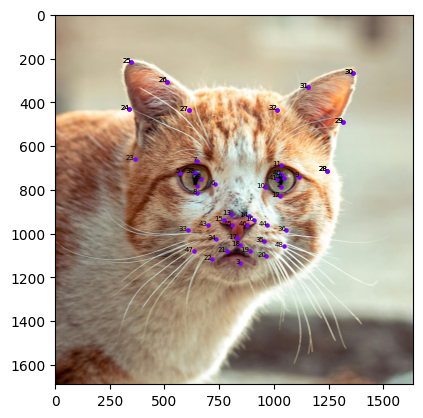

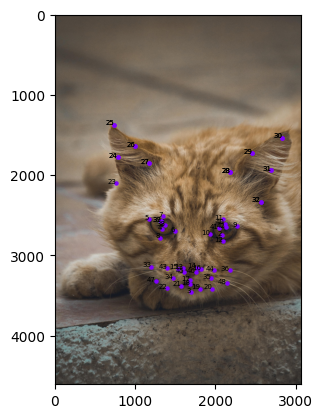

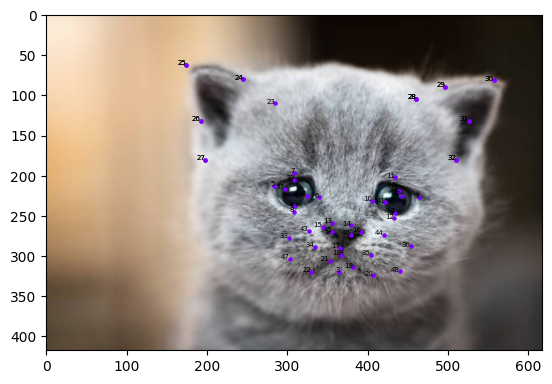

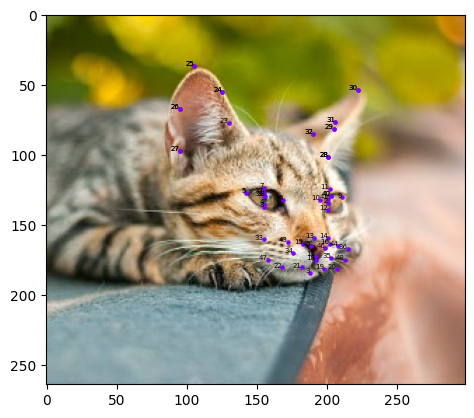

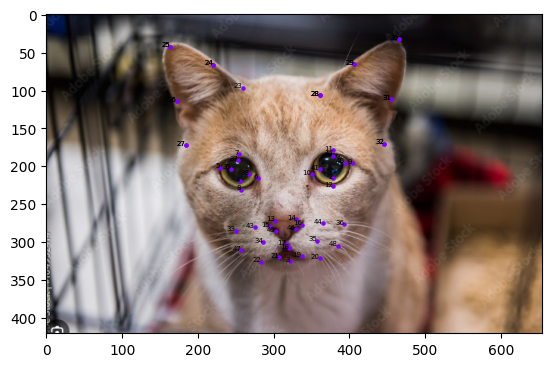

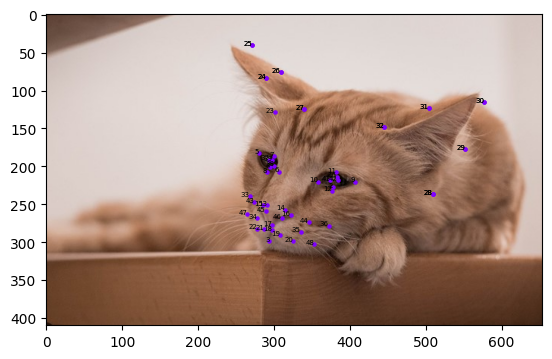

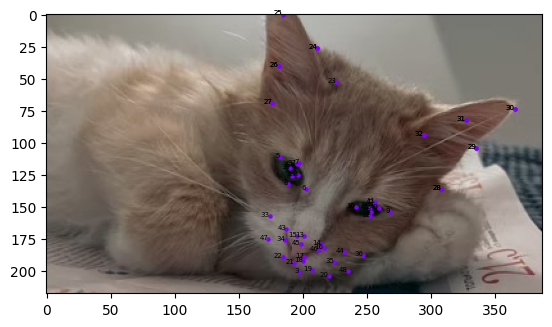

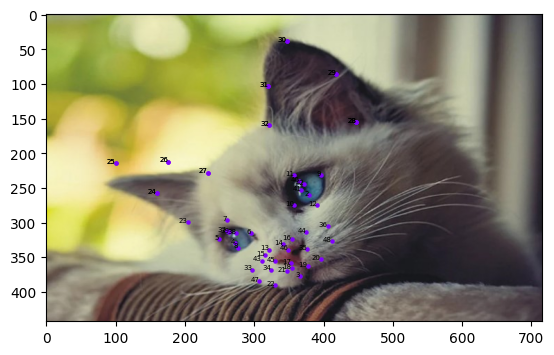

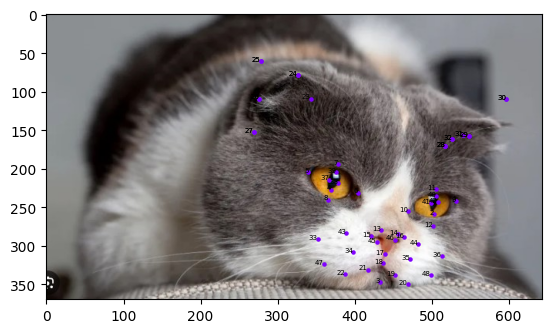

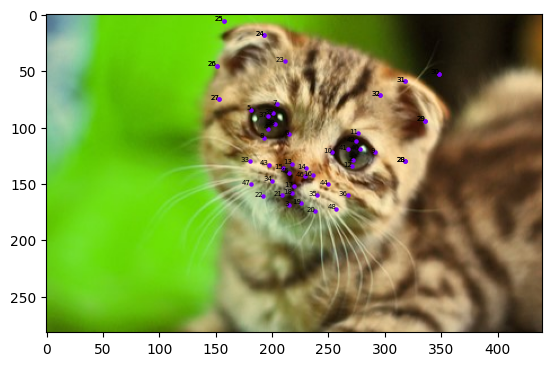

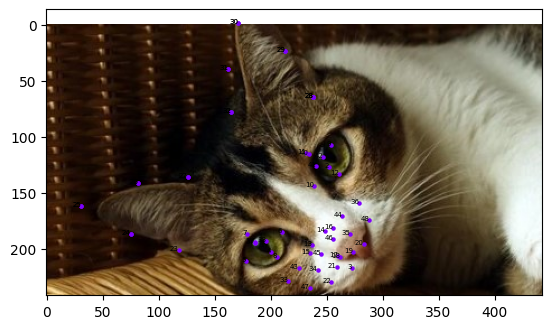

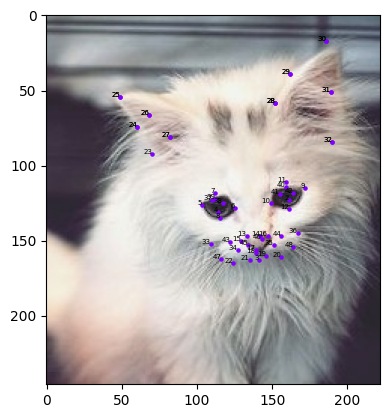

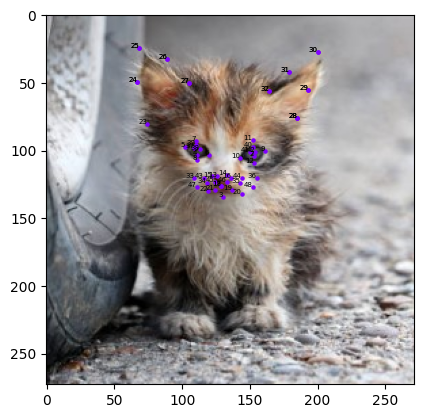

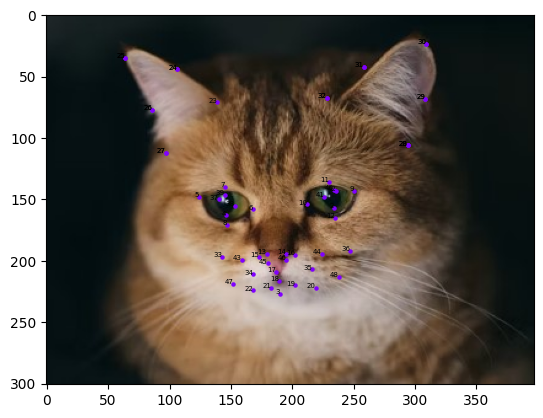

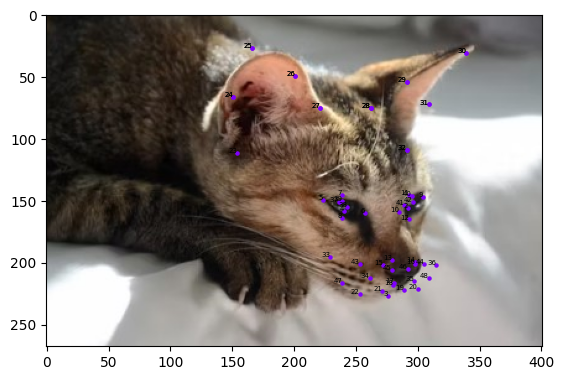

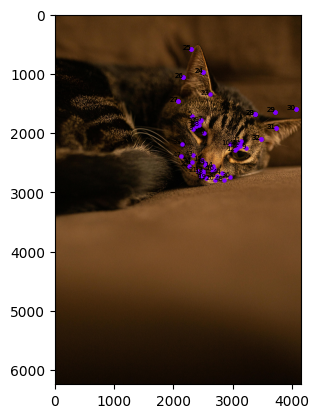

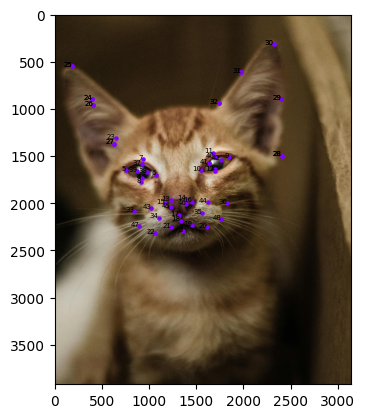

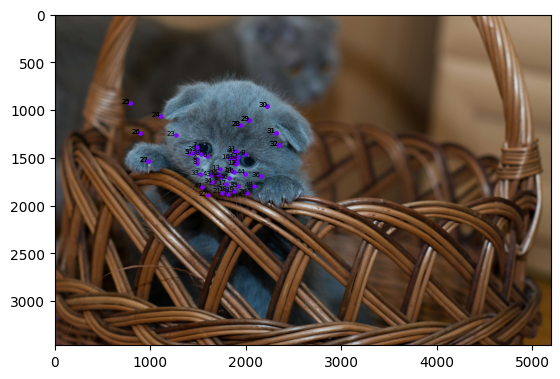

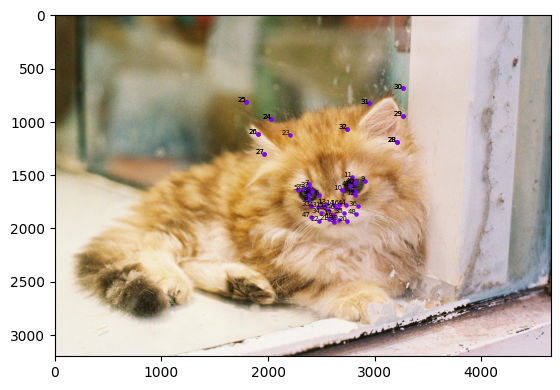

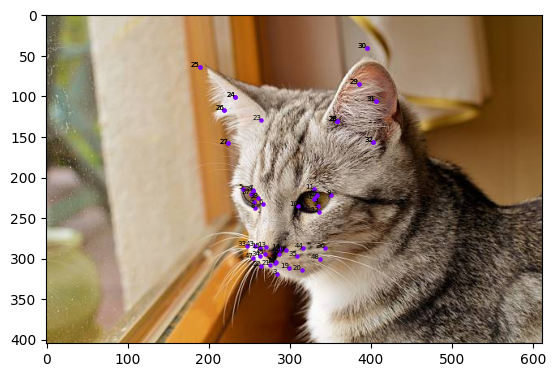

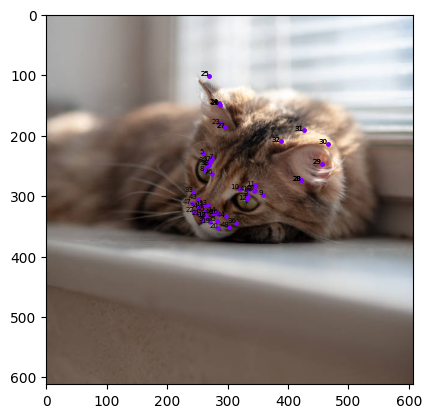

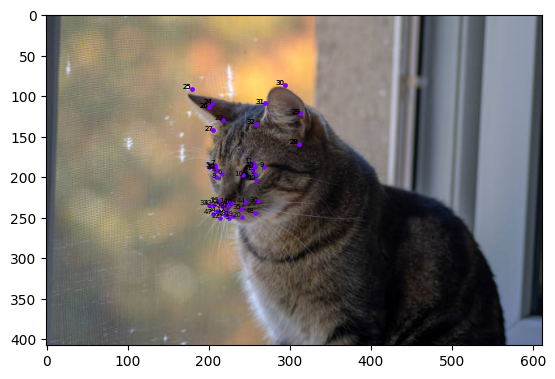

In [11]:
def compute_vectors_from_images(folder_path, url):
    vector_data = []

    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, filename)
            result = send_image_for_processing(img_path, url)
            image = Image.open(img_path)

            # Create a figure and axis
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(image)

            # Define the number of distinct animals
            num_animals = len(result)
            cmap = plt.colormaps['rainbow']

            if result:
                # Debug print to check the structure of the result
                print("Result:", result)
                for i, animal_data in enumerate(result):

                # for i,animal_data in result:
                    for animal, details in animal_data.items():
                        color = cmap(i / num_animals)
                        landmarks = details['landmarks']
                        for region, indices in regions.items():
                            x_coords = [landmarks[j]['x'] for j in indices if j < len(landmarks)]  # Indices are 0-based
                            y_coords = [landmarks[j]['y'] for j in indices if j < len(landmarks)]
                            ax.scatter(x_coords, y_coords, color=color, s=5, label=region)                     


                            if region == 'Left Eye':
                                central_x, central_y = mean_point(landmarks, [36, 37])
                                mean_point_left_eye = (central_x, central_y)
                                for index in [3,4,5,6,7,36,37,38]:
                                    x, y = landmarks[index]['x'], landmarks[index]['y']
                                    vector_data.append({'filename': filename,
                                                        'region': region, 
                                                        'landmark': index, 
                                                        'vector_x':x - central_x, 
                                                        'vector_y': y - central_y,
                                                        'class' : feel
                                                        })
                            elif region == 'Right Eye':
                                central_x, central_y = mean_point(landmarks, [39,40])
                                mean_point_right_eye = (central_x, central_y)
                                for index in [1,8,9,10,11,39,40,41]:
                                    x, y = landmarks[index]['x'], landmarks[index]['y']
                                    vector_data.append({'filename': filename,
                                                        'region': region, 
                                                        'landmark': index, 
                                                        'vector_x':x - central_x, 
                                                        'vector_y': y - central_y,
                                                        'class' : feel})
                                    
                            elif region == 'Forehead':
                                central_x, central_y = mean_point(landmarks, [22,31])
                                mean_point_forehead = (central_x, central_y)
                                for index in [22,23,24,25,26,27,28,29,30,31]:
                                    x, y = landmarks[index]['x'], landmarks[index]['y']
                                    vector_data.append({'filename': filename,
                                                        'region': region, 
                                                        'landmark': index, 
                                                        'vector_x':x - central_x, 
                                                        'vector_y': y - central_y,
                                                        'class' : feel})
                                    
                            elif region == 'Nose, Mouth, and Whiskers':
                                central_x, central_y = landmarks[16]['x'], landmarks[16]['y']
                                mean_point_nose = (central_x, central_y)
                                for index in [0,2,12,13,14,15,16,17,18,19,20,21,32,33,34,35,42,43,44,45,46,47]:
                                    x, y = landmarks[index]['x'], landmarks[index]['y']
                                    vector_data.append({'filename': filename,
                                                        'region': region, 
                                                        'landmark': index, 
                                                        'vector_x':x - central_x, 
                                                        'vector_y': y - central_y,
                                                        'class' : feel})

                            for j, (x, y) in enumerate(zip(x_coords, y_coords)):
                                ax.text(x, y, str(indices[j]+1), fontsize=5, ha='right')                                  
                                                        
                                   
    # Convert to DataFrame
    df = pd.DataFrame(vector_data)
    return df

# Define the folder path containing images and the API URL
folder_path = r"C:\Users\Wanlipa\Desktop\Deep Learing\project\cat-facial-expression-recognition\cat-facial-expression-recognition\Images\sad"
url = "http://34.165.60.2:6000/landmarks"
feel = 'sad' # 'sad' 'happy' 'angry'

# Compute vectors and convert to DataFrame
vector_df = compute_vectors_from_images(folder_path, url)
print(vector_df)

'''
# Save DataFrame to CSV
output_csv_path = os.path.join(folder_path, 'vector_data.csv')
vector_df.to_csv(output_csv_path, index=False)
'''"T4A_animal_facial_landmarks_API_(Boss2) (1).ipynb"
# Display the DataFrame
vector_df.head()
